**NOTEBOOK 7**

### Exercise 07.1
In this exercise it was asked to add tail corrections to potential energy $U$ and pressure $P$ equations in the Molecular Dynamics code provided in exercise 4. In fact, in the computations carried out in exercise 4 both $U$ and $P$ had a cut-off radius, beyond which the interactions among atoms were neglected. The following relations hold for the tail corrections ($U$ and $P$ respectively): $$ \frac{\langle V_{LJ}\rangle_{tail}}{N} \approx 8\pi\rho_{LJ}\epsilon \Big[\frac{1}{9r_c^9} - \frac{1}{3r_c^3}\Big],$$ $$ \frac{\langle W_{LJ}\rangle_{tail}}{3N\epsilon} \approx 32\pi\rho_{LJ} \Big[\frac{1}{9r_c^9} - \frac{1}{6r_c^3}\Big].$$
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2
In this exercise it was asked to simulate the same system of exercise 4 leveraging, instead of the Molecular Dynamics code, the Monte Carlo version of it. Therefore, in this case the system is considered in the canonical ensemble (NVT) and the temperature is thus kept constant, so there is no need to start the simulation from a different temperature and wait for it to stabilize.  
In order to satisfy the 50% rule in Metropolis Algorithm, the following delta-values were chosen: 

- $\delta_{solid} = 0.07$;
- $\delta_{liquid} = 0.12$;
- $\delta_{gas} = 6.0$ (even though here acceptance $\sim$ 60%); 

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import math

In [2]:
#read the csv data
instant_p_energy_solid = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_02/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/instant_penergy.dat")
instant_p_energy_liquid = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_02/NSL_SIMULATOR/OUTPUT/OUTPUT_LIQUID/instant_penergy.dat")
instant_p_energy_gas = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_02/NSL_SIMULATOR/OUTPUT/OUTPUT_GAS/instant_penergy.dat")

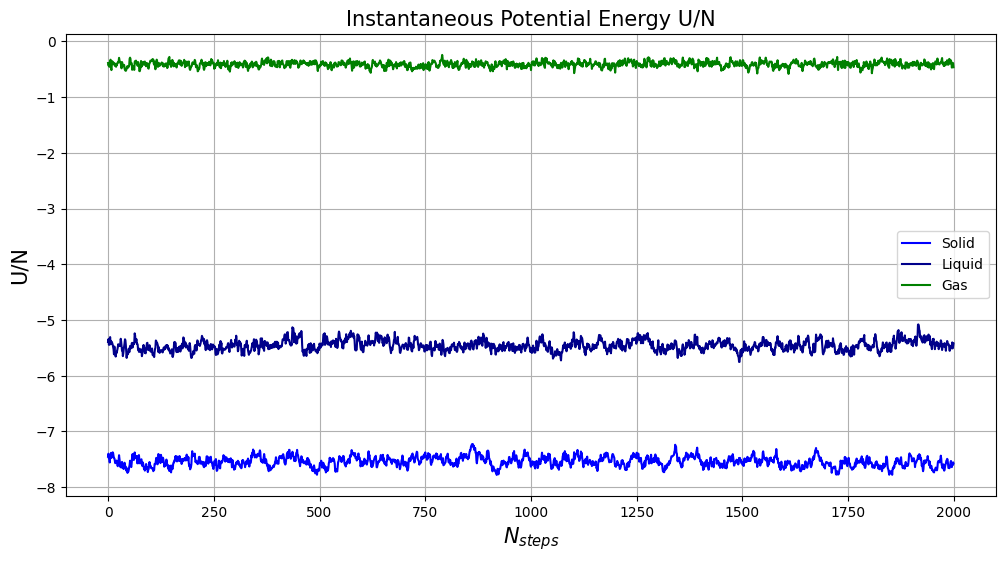

In [3]:
M = 2000 #Number of throws
x_eq = np.arange(M)

plt.figure(figsize=(12,6))
plt.plot(x_eq, instant_p_energy_solid[0:2000], label="Solid", color="blue")
plt.plot(x_eq, instant_p_energy_liquid[0:2000], label="Liquid", color="darkblue")
plt.plot(x_eq, instant_p_energy_gas[0:2000], label="Gas", color="g")
plt.xlabel('$N_{steps}$', fontsize=15)
plt.ylabel("U/N", fontsize=15)
plt.title("Instantaneous Potential Energy U/N", fontsize=15)
plt.legend()
plt.grid(True)
plt.show()


With the data plotted above, an investigation on the autocorrelation of the values of $U/N$ was carried out in order to determine the typical time-scale in which the autocorrelation decreases. Jointly with the  plot on the statistical uncertainty below, the autocorrelation plot helps to estimate how large should be the blocks in the blocking method techinque. The autocorrelation was computed using the relation $$\chi(t) = \frac{\frac{1}{t_{max}-t}\sum_0^{t_{max}-t} m(t')m(t'+t)-\frac{1}{t_{max}-t} \sum_0^{t_{max}-t} m(t')\times\frac{1}{t_{max}-t}\sum_0^{t_{max}-t} m(t'+t)}{\frac{1}{t_{max}}\sum_0^{t_{max}} m^2(t')-\left(\frac{1}{t_{max}}\sum_0^{t_{max}} m(t')\right)^2 }.$$

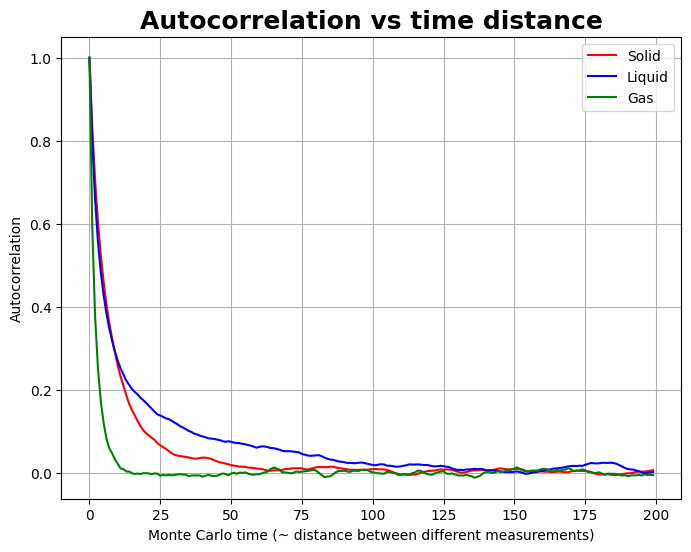

In [4]:
#AUTOCORRELATION FUNCTION 
N = 100000
tmax = N
taumax = 200

# Funzione per calcolare l'autocorrelazione
def autocorrelation(instant_p_energy):
    chi = []
    for tau in range(taumax):
        s1=0
        s2=0
        s3=0
        s4=0
        s5=0
        for tp in range(tmax-tau):
            s1 += instant_p_energy[tp]*instant_p_energy[tp+tau]
            s2 += instant_p_energy[tp]
            s3 += instant_p_energy[tp+tau]

        for tp in range(tmax):
            s4 += instant_p_energy[tp]*instant_p_energy[tp]
            s5 += instant_p_energy[tp]

        fatt = 1/(tmax-tau)
        fatt2 = 1/tmax

        num = fatt*s1-fatt*s2*fatt*s3
        den = fatt2*s4 - (fatt2*s5)*(fatt2*s5)

        chi.append(num/den)
    
    return chi

# Calcolo dell'autocorrelazione per solido, liquido e gas
chi_solid = autocorrelation(instant_p_energy_solid)
chi_liquid = autocorrelation(instant_p_energy_liquid)
chi_gas = autocorrelation(instant_p_energy_gas)

# Grafico
plt.figure(figsize=(8,6))
plt.plot(chi_solid, color='red', label='Solid')
plt.plot(chi_liquid, color='blue', label='Liquid')
plt.plot(chi_gas, color='green', label='Gas')

plt.xlabel("Monte Carlo time (~ distance between different measurements)")
plt.ylabel("Autocorrelation")
plt.legend()
plt.grid()
plt.title("Autocorrelation vs time distance", fontsize=18, fontweight="bold")
plt.show()

As one should expect, the autocorrelation decays with an exponential law. Therefore, in order to reduce the correlation among different blocks and analyze statistically independent samples, one should dimension the blocks so that L (dimension of a block) is greater than the correlation length.  

**Analysis of the statistical uncertainties as a function of the block size**

In [5]:
def error(av, av2, n):  
    if n==0: return 0
    else: return np.sqrt((av2 - av**2)/n) 
    
def data_blocking(data, L):
    M = len(data) # Total number of throws
    N = M // L      # Number of blocks 
    ave = 0
    av2 = 0
    
    for i in range(N):
        summ = 0
        for j in range(L):
            k = j+i*L
            summ += data[k]
        ave += summ/L
        av2 += (summ/L)**2
    ave /= N
    av2 /= N
    
    return error(ave,av2,N)

In [6]:
Lmin = 10    # Min number of throws in each block
Lmax = 5000  # Max number of throws in each block
M = 500000   # Total number of throws
L = np.array([x for x in range(Lmin,Lmax+1) if (M%x == 0)]) #divisors of M

error_solid, error_liquid, error_gas = [], [], []
for i in L:
    error_solid.append(data_blocking(instant_p_energy_solid, i))
    error_liquid.append(data_blocking(instant_p_energy_liquid, i))
    error_gas.append(data_blocking(instant_p_energy_gas, i))

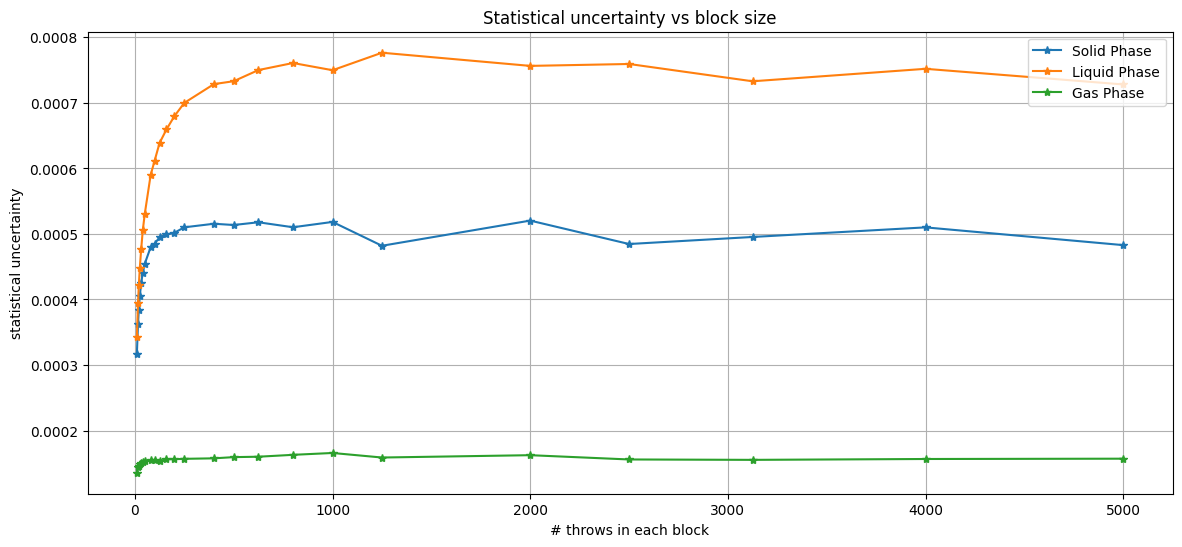

In [7]:
plt.figure(figsize=(14,6))
plt.plot(L, error_solid, '*-', label='Solid Phase')
plt.plot(L, error_liquid, '*-', label='Liquid Phase')
plt.plot(L, error_gas, '*-', label='Gas Phase')
plt.xlabel('# throws in each block')
plt.ylabel('statistical uncertainty')
plt.legend()
plt.title("Statistical uncertainty vs block size")
plt.grid()
plt.show()

The plot show, for all the three phases, an underestimation of the uncertainty if the blocks are not big enough. This is due to the correlation that emerges among different samples. After an initial increasing phase, the uncertainty stabilizes and oscillates around higher values.  
Therefore, for the future simulations the following values were chosen for the number of blocks N and the block size L : 

- Solid phase --- > $N = 250$, $L = 2000$; 
- Liquid phase ---> $N = 250$, $L = 2000 $; 
- Gaseous phase ---> $N = 200$, $L = 3000$; 

### Exercise 07.3
In this exercise it was asked to include code in order to compute the radial distribution function as a function of the distance between particles r, with $r \in [0, L/2]$ and $L$ the dimension of one side of the box the particles are into. The radial distribution function $g(r)$ is defined as $$ g(r) = \frac{1}{\rho N \Delta V(r)} \Big\langle \sum \sum_{i \not = j = 1}^N \delta \big[|\vec{r}| - |\vec{r_i}-\vec{r_j}|\big] \Big\rangle$$ in which $\Delta V(r)$ is defined as $\Delta V(r) = \frac{4\pi}{3}\big[(r+dr)^3 -r^3\big].$  
This function $g(r)$ returns the probability that two atoms are found at a distance r. The algorithm for the calculation was implemented filling in a 100 bins histogram in which the counting of the corresponding bin was increased by +2 each time two particles were found at a distance in $[r, r+dr]$. In the end the histogram was normalized. 

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

In [8]:
solid_gofr_NVT = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/gofr_ave_NVT.dat")
liquid_gofr_NVT = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_LIQUID/gofr_ave_NVT.dat")
gas_gofr_NVT = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_GAS/gofr_ave_NVT.dat")

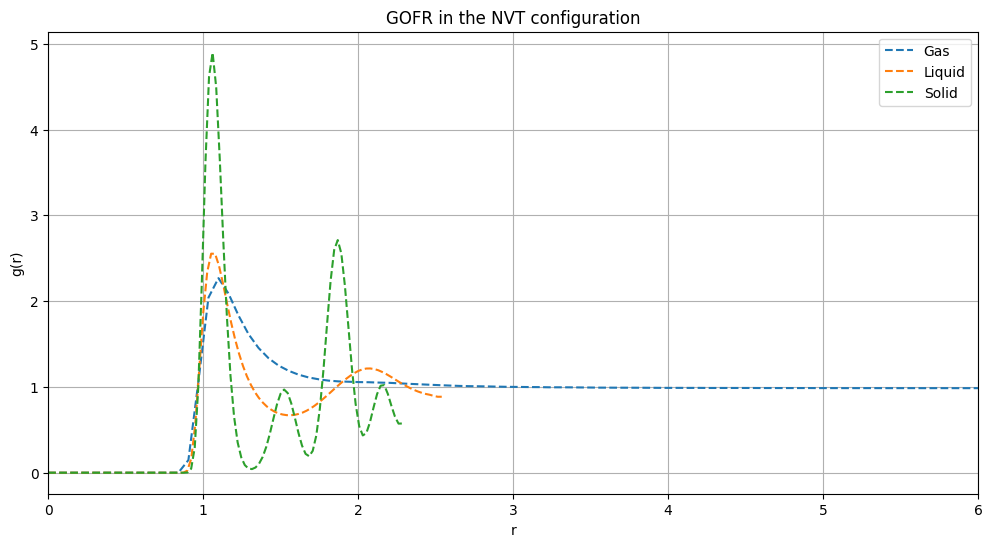

In [9]:
plt.figure(figsize=(12,6))
plt.xlim(0., 6)
plt.plot(gas_gofr_NVT[:,0],gas_gofr_NVT[:,1], label="Gas", linestyle='--')
plt.plot(liquid_gofr_NVT[:,0],liquid_gofr_NVT[:,1], label="Liquid", linestyle='--')
plt.plot(solid_gofr_NVT[:,0],solid_gofr_NVT[:,1], label="Solid", linestyle='--')
plt.title("GOFR in the NVT configuration")
plt.ylabel("g(r)")
plt.xlabel("r")
plt.legend()
plt.grid(True)
plt.show()

Under a certain distance r, the probability of finding two particles at that distance is null. This r-value corresponds to the minimum of the Lennard-Jones potential, in fact at this $r_{min}$ the energetic configuration of the system particle-particle is stable and therefore it has a high probability of realization. Under this $r_{min}$ the repulsive part of the interaction dominates and therefore the probability of finding two particles at a distance $r < r_{min}$ decays.  
With that being said, the first peak in each phase is around $r \sim r_{min}$ for the aforementioned reason. The plot however shows different peaks depending on the phase considered. For the solid phase, since it is characterized by a well-defined lattice structure, the particles occupy specified sites in this lattice and therefore the different peaks reflect this precise structure. For what concerns the liquid phase, also here the system has a certain "order" but the particles have more freedom of motion with respect to the solid phase and therefore the peaks are weaker and damped. In the last scenario, the particles are free to move as the interactios among them are almost negligible and thus in the gaseous phase, after a first strongly damped peak, the radial distribution function $g(r)$ is flat reflecting the fact that there is an almost uniform probability of finding two particles at a generic distance r. 

### Exercise 07.4
In this exercise it was asked to perform Monte Carlo simulations with the upgraded code and compare the results for $g(r)$ obtained in the microcanonical ensemble (NVE, Molecular Dynamics code) and in the canonical ensemble (NVT, Monte Carlo simulations). Also, it was asked to plot the results for some physical quantities in the canonical ensemble. 

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

In [10]:
solid_gofr_NVE = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/gofr_ave_NVE.dat")
liquid_gofr_NVE = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_LIQUID/gofr_ave_NVE.dat")
gas_gofr_NVE = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_GAS/gofr_ave_NVE.dat")

In [11]:
solid_pressure = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/pressure_NVT.dat")
liquid_pressure = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_LIQUID/pressure_NVT.dat")
gas_pressure = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_GAS/pressure_NVT.dat")

In [12]:
solid_penergy = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/potential_energy_NVT.dat")
liquid_penergy = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_LIQUID/potential_energy_NVT.dat")
gas_penergy = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_07/exercise_7_04/NSL_SIMULATOR/OUTPUT/OUTPUT_GAS/potential_energy_NVT.dat")

**PRESSURE**

In [13]:
M = 500000 #Number of throws
N = 250 #Number of blocks
L = (int)(M/N) #Number of throws per block
x = np.arange(N) 
x *= L 

In [14]:
M_gas = 600000 #Number of throws
N_gas = 200 #Number of blocks
L_gas = (int)(M_gas/N_gas) #Number of throws per block
x_gas = np.arange(N_gas) 
x_gas *= L_gas 

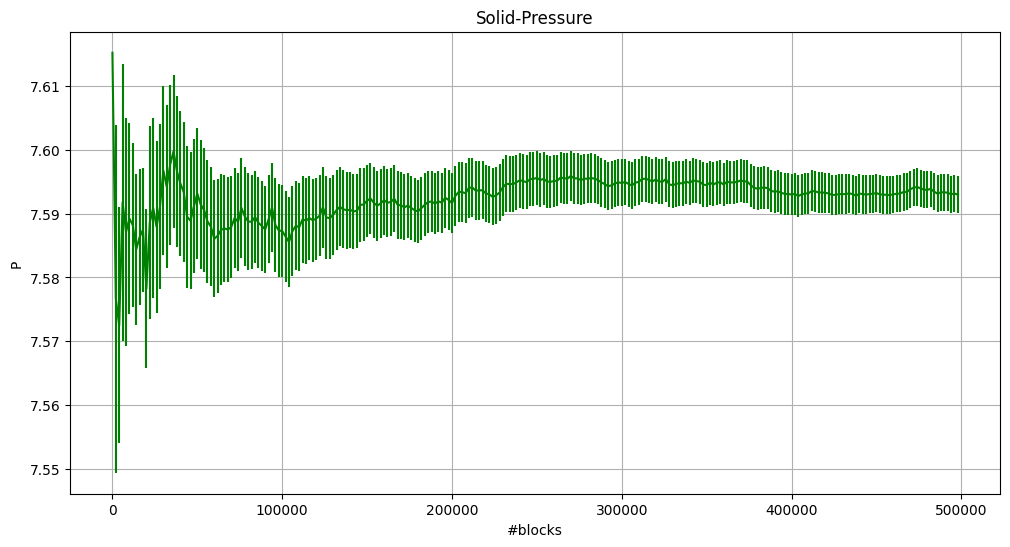

In [15]:
y = solid_pressure[:,2]
plt.figure(figsize=(12,6))
plt.errorbar(x,y,yerr=solid_pressure[:,3], color="green")
plt.title("Solid-Pressure")
plt.xlabel("#blocks")
plt.ylabel("P")
plt.grid(True)
plt.show()

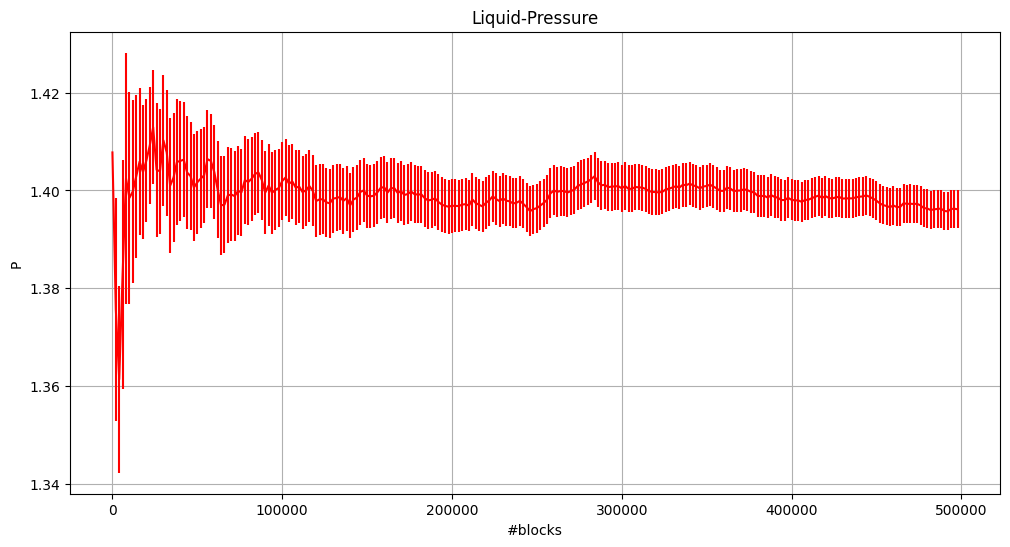

In [16]:
y = liquid_pressure[:,2]
plt.figure(figsize=(12,6))
plt.errorbar(x,y,yerr=liquid_pressure[:,3], color="red")
plt.title("Liquid-Pressure")
plt.xlabel("#blocks")
plt.ylabel("P")
plt.grid(True)
plt.show()

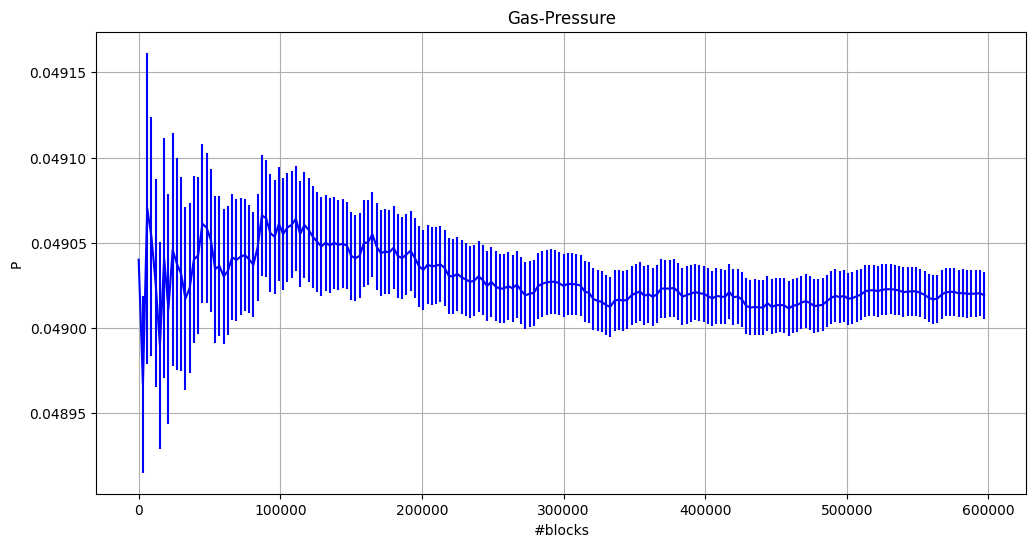

In [17]:
y = gas_pressure[:,2]
plt.figure(figsize=(12,6))
plt.errorbar(x_gas,y,yerr=gas_pressure[:,3], color="blue")
plt.title("Gas-Pressure")
plt.xlabel("#blocks")
plt.ylabel("P")
plt.grid(True)
plt.show()

**POTENTIAL ENERGY**

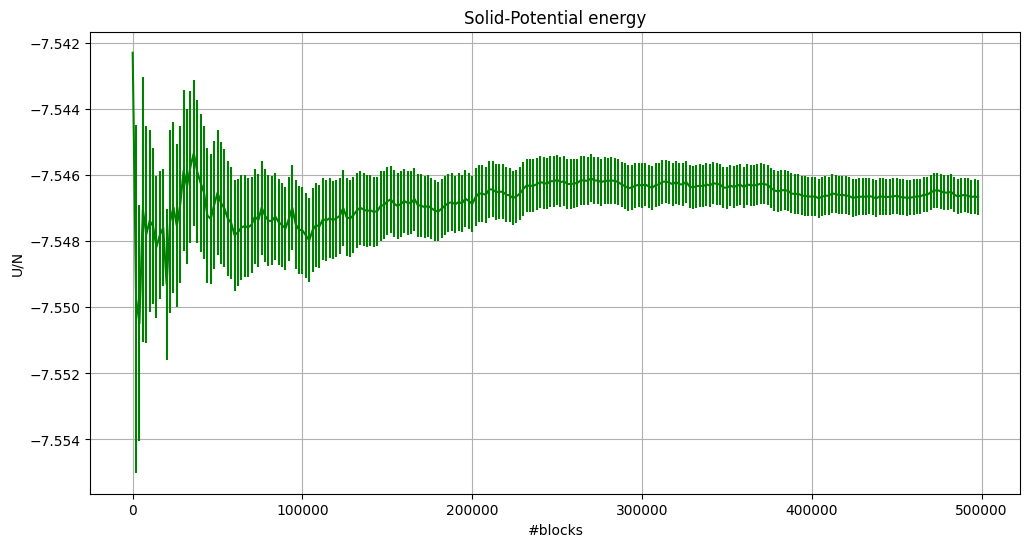

In [18]:
y = solid_penergy[:,2]
plt.figure(figsize=(12,6))
plt.errorbar(x,y,yerr=solid_penergy[:,3], color="green")
plt.title("Solid-Potential energy")
plt.xlabel("#blocks")
plt.ylabel("U/N")
plt.grid(True)
plt.show()

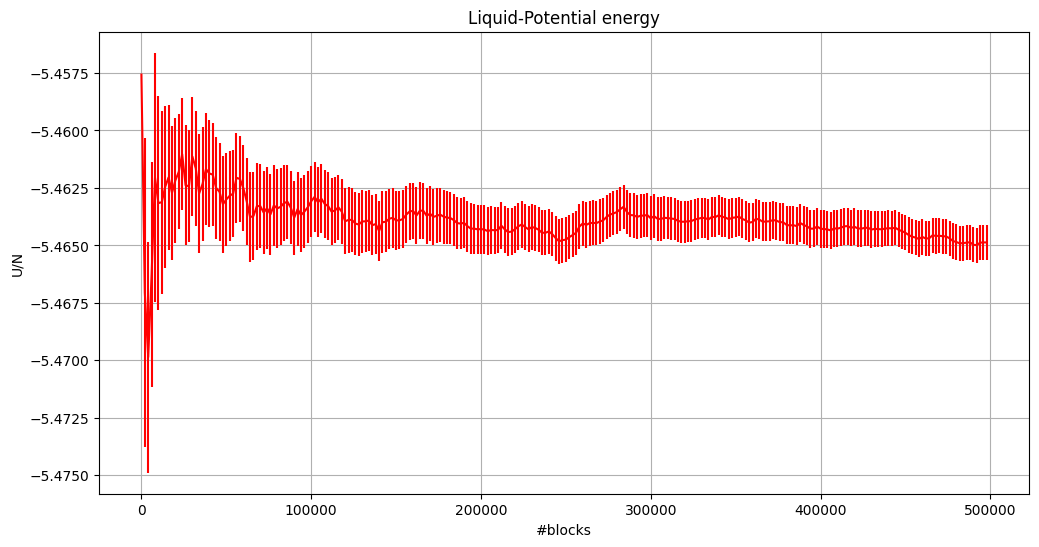

In [19]:
y = liquid_penergy[:,2]
plt.figure(figsize=(12,6))
plt.errorbar(x,y,yerr=liquid_penergy[:,3], color="red")
plt.title("Liquid-Potential energy")
plt.xlabel("#blocks")
plt.ylabel("U/N")
plt.grid(True)
plt.show()

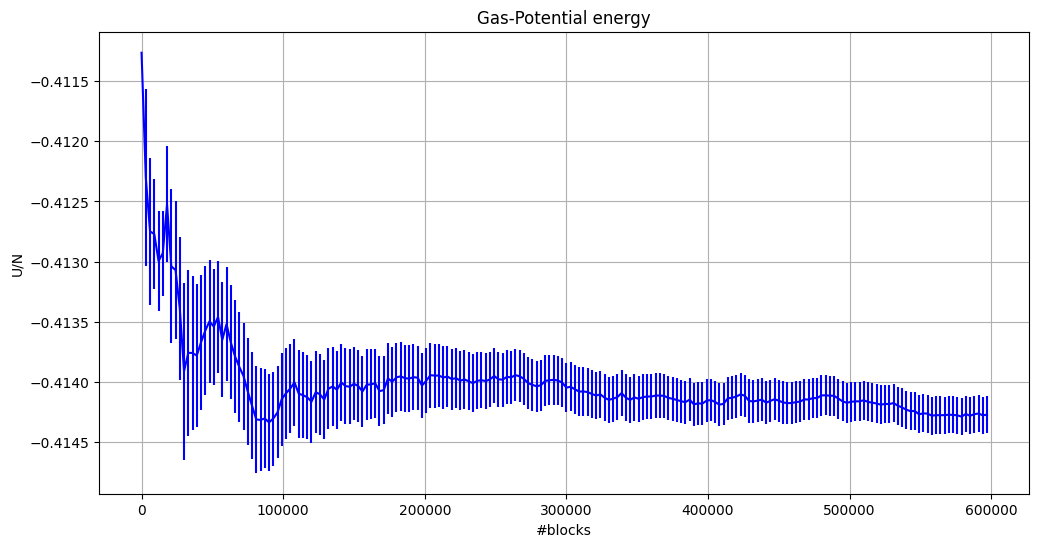

In [20]:
y = gas_penergy[:,2]
plt.figure(figsize=(12,6))
plt.errorbar(x_gas,y,yerr=gas_penergy[:,3], color="blue")
plt.title("Gas-Potential energy")
plt.xlabel("#blocks")
plt.ylabel("U/N")
plt.grid(True)
plt.show()

**GOFR: NVE vs NVT**

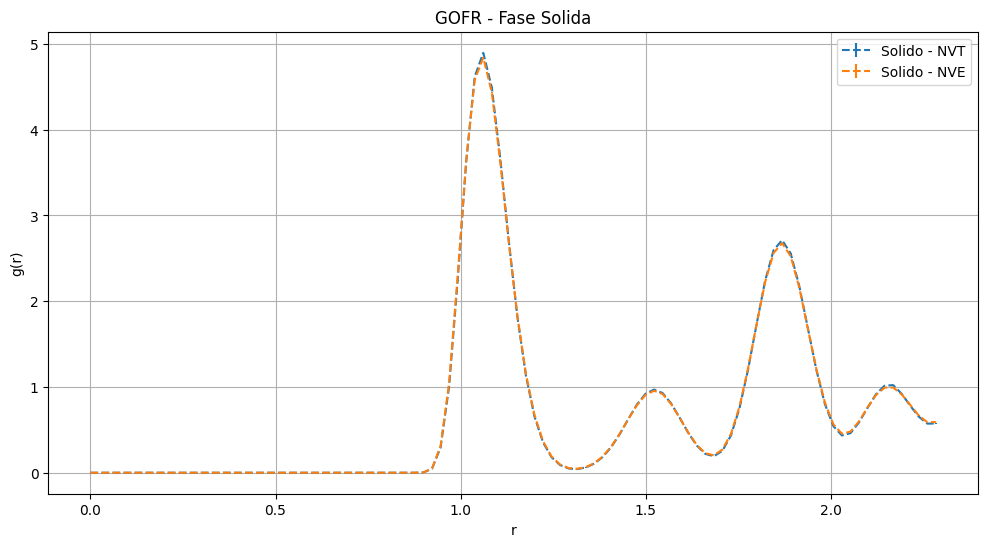

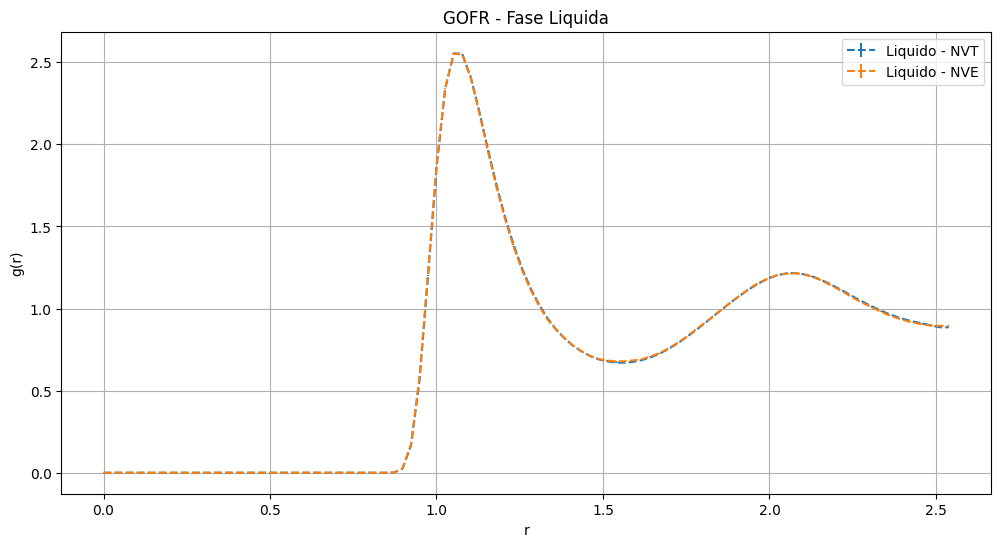

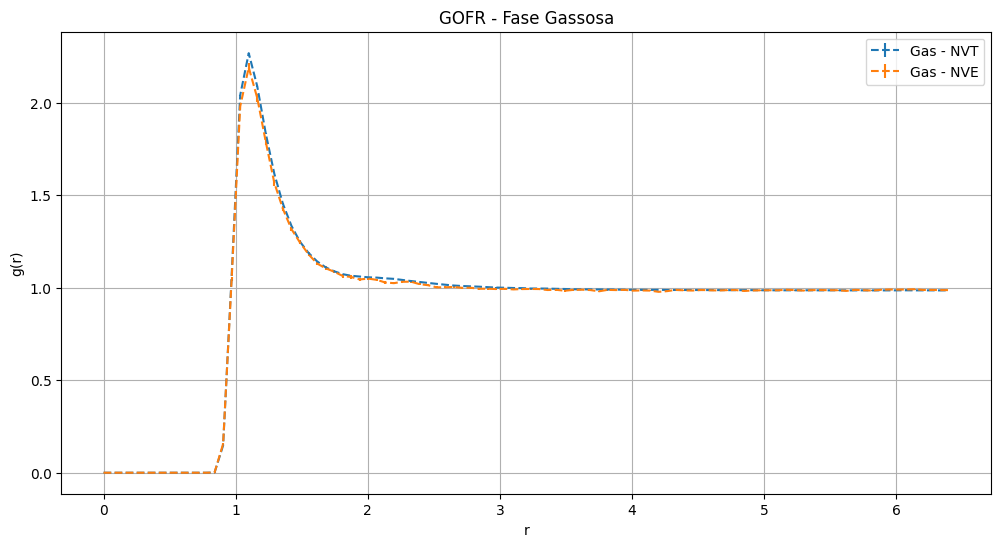

In [21]:
# Dati per la fase solida
x_solid_NVT = solid_gofr_NVT[:, 0]
y_solid_NVT = solid_gofr_NVT[:, 1]
x_solid_NVE = solid_gofr_NVE[:, 0]
y_solid_NVE = solid_gofr_NVE[:, 1]

# Dati per la fase liquida
x_liquid_NVT = liquid_gofr_NVT[:, 0]
y_liquid_NVT = liquid_gofr_NVT[:, 1]
x_liquid_NVE = liquid_gofr_NVE[:, 0]
y_liquid_NVE = liquid_gofr_NVE[:, 1]

# Dati per la fase gassosa
x_gas_NVT = gas_gofr_NVT[:, 0]
y_gas_NVT = gas_gofr_NVT[:, 1]
x_gas_NVE = gas_gofr_NVE[:, 0]
y_gas_NVE = gas_gofr_NVE[:, 1]

# --- Primo grafico: Fase Solida ---
plt.figure(figsize=(12, 6))
plt.errorbar(x_solid_NVT, y_solid_NVT, yerr=solid_gofr_NVT[:, 2], label="Solido - NVT", linestyle='--')
plt.errorbar(x_solid_NVE, y_solid_NVE, yerr=solid_gofr_NVE[:, 2], label="Solido - NVE", linestyle='--')
plt.title("GOFR - Fase Solida")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.legend()
plt.grid(True)
plt.show()

# --- Secondo grafico: Fase Liquida ---
plt.figure(figsize=(12, 6))
plt.errorbar(x_liquid_NVT, y_liquid_NVT, yerr=liquid_gofr_NVT[:, 2], label="Liquido - NVT", linestyle='--')
plt.errorbar(x_liquid_NVE, y_liquid_NVE, yerr=liquid_gofr_NVE[:, 2], label="Liquido - NVE", linestyle='--')
plt.title("GOFR - Fase Liquida")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.legend()
plt.grid(True)
plt.show()

# --- Terzo grafico: Fase Gassosa ---
plt.figure(figsize=(12, 6))
plt.errorbar(x_gas_NVT, y_gas_NVT, yerr=gas_gofr_NVT[:, 2], label="Gas - NVT", linestyle='--')
plt.errorbar(x_gas_NVE, y_gas_NVE, yerr=gas_gofr_NVE[:, 2], label="Gas - NVE", linestyle='--')
plt.title("GOFR - Fase Gassosa")
plt.xlabel("r")
plt.ylabel("g(r)")
plt.legend()
plt.grid(True)
plt.show()

There is a good agreement between the radial distribution function $g(r)$ computed in the NVT scenario (Monte Carlo) and in the NVE scenario (Molecular Dynamics). This is due to the equilibration of the temperature in the NVE scenario, since it leads the system to similar thermodynamic conditions of the NVT scenario and thus producing results comparable to the ones obtained in the canonical ensemble. 